# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

## Features:
    Runs scored: no. of times a player reached home plate legally and safely
    At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
    Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
    Home runs allowed: total home runs allowed
    Strikeout : number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the                 third strike or batter may attempt to run to first base
    Earned run: number of runs that did not occur as a result of errors or passed balls
    Earned Run Average(ERA) - The average number of earned runs allowed by a pitcher per nine innings
    Shutout: number of complete games pitched with no runs allowed
    Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering           the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered             the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more             innings
    Complete game: number of games where player was the only pitcher for their team
    Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits             as a result

In [1]:
#importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Baseball case study.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Takeaway at first glance:
    1. All features are contionous 
    2. Different range of scale is present 

In [5]:
#no. of rows & columns
df.shape

(30, 17)

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Observation:
    No null values is present
    All variables are of int except of ERA

In [7]:
#another technique to check for nan for each feature
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#statistical analysis
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observations:
    1. All figures are positive values including zeros
    2. std for ['R','AB','H','HR','BB','SO','RA','ER'] is significantly varying
    3. IQR seems in the range. Not much of a prolongness is visible
    4. Mean & Median are near to each other
    5. The percentile distribution seems to have a normal distribution
    6. The mean of 2B is greater than 3B which means, the hitter has achieved 2nd base more time than 3rd base
    7. Minimum home runs achieved by any team is 100 while max is 232.
    8. The average wins comes to 81 with its mode being the same at 81.
    9. Minimum runs scored by a player is 573, its maximum is 891 with 50% being at 689
    10. The minimum hit is scored at 1324 and maximum is 1515.
    11. Base on balls has seen its std at 57(suprising!) and its max is 570 with 75% at 501.
    12. Strike out has it max greater than hits but not far away.
    13. The max stolen bases can be seen at 134 with its mean & median  @83.5, min @44, 75% @96.5.
    14. There is massie difference between ER & ERA for every stats. Which means each teams have their lowest runs almost           to null.
    15. CG:- We can see a max of 11. Means there's an 11 instance where only one player pitched for their team.
    15. Error - The average error lies @94.33, median @91 and max @126

<AxesSubplot:>

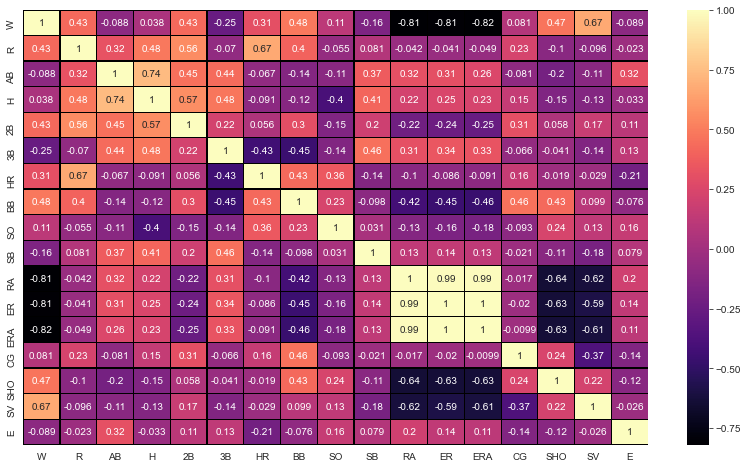

In [15]:
#lets look at the correlation matrix in graph
#import matplotlib
#matplotlib.rcParams['figure.figsize'] = (12,6)

sns.set_style('whitegrid')
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 0.2, cmap = 'magma')

### Observations:
    1. [RA&ER, RA&ERA] has strong positive relations. (0.99)
    2. H&AB has 0.74 relations
    3. SV&W have 67% relation
    4. R&HR also have 67% relations
    5. H&2B have 57& relations
    
    6. [W&RA, W&ER, W&ERA] has strong negative relations (0.81)
    7. [(RA&SHO, RA&SV), (ER&SHO,ER&SV), (ERA&SHO, ERA&SO)] also have around 62%-63% negative relations.

## Visualisation

In [18]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

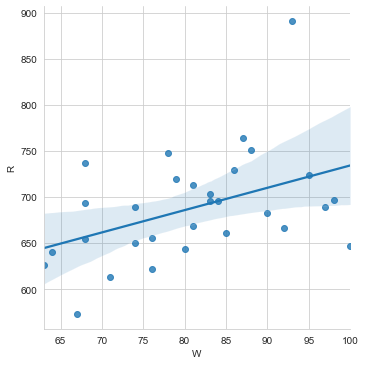

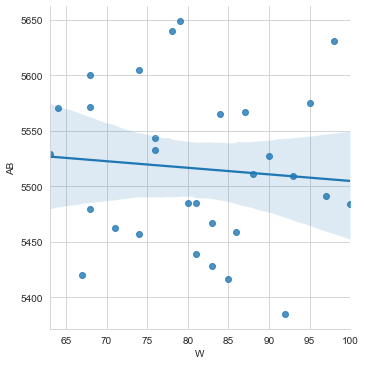

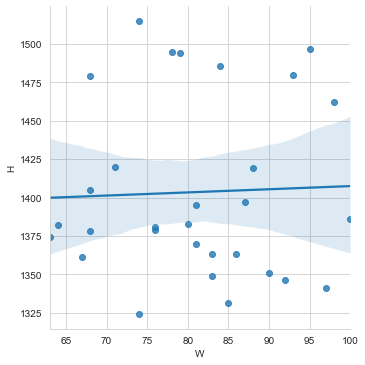

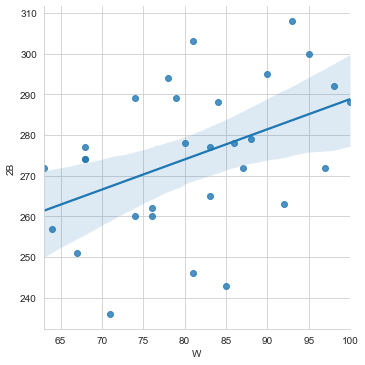

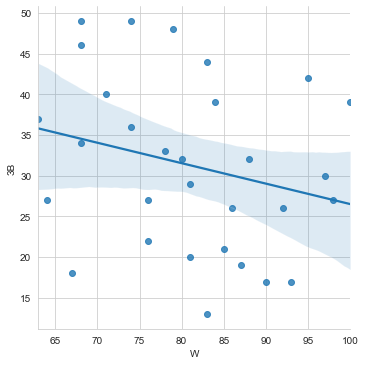

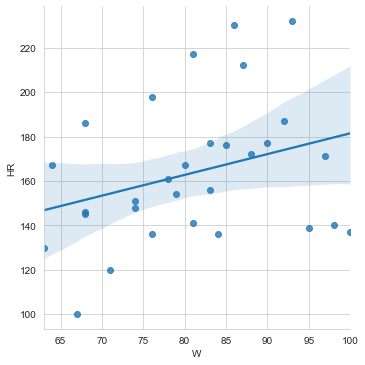

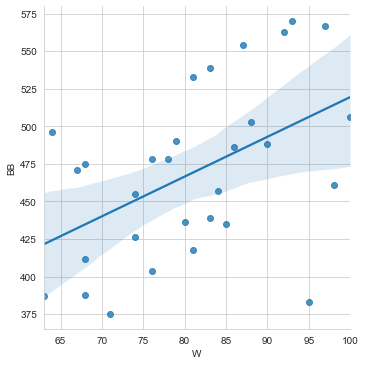

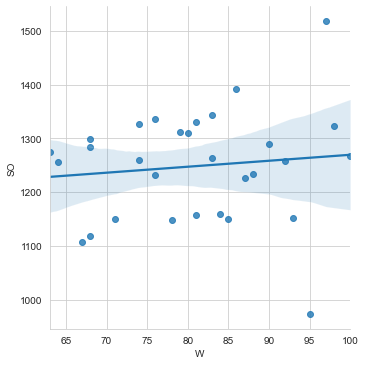

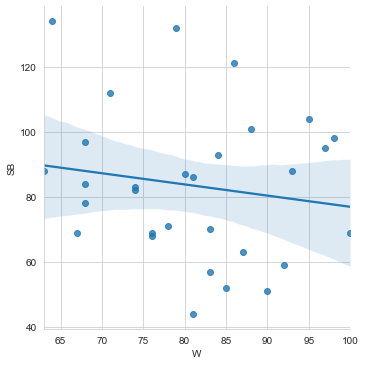

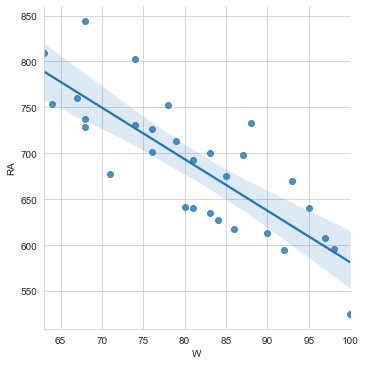

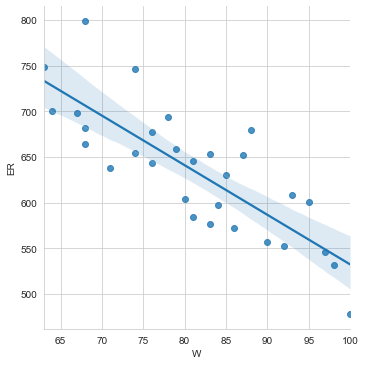

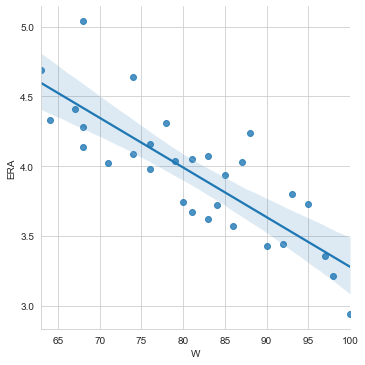

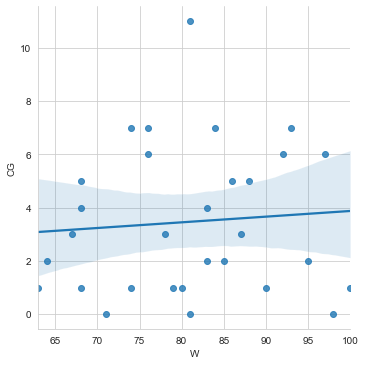

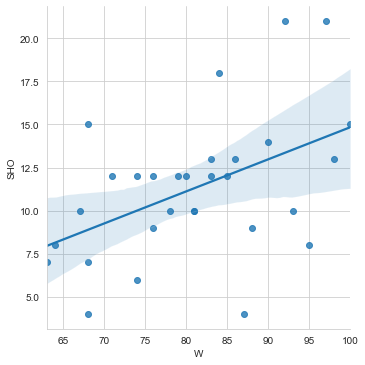

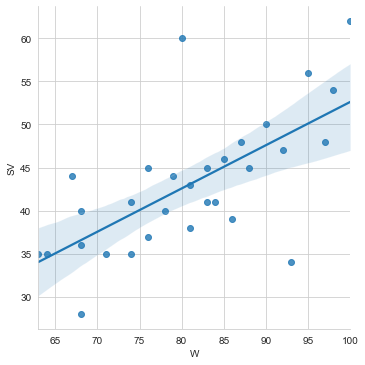

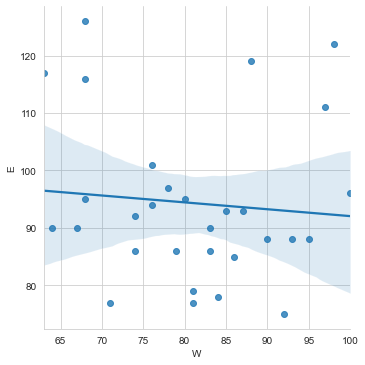

In [17]:
for i, cols in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.lmplot(x='W',y=cols,data=df )

### Observations:
    1. R vs W - positive linear graph. Higher the runs more will be wins
    2. AB vs W - negative linear graph. Some AB has higher but Wins is less
    3. H vs W - slight positive graph. Even at lower hits, chances of winning are high
    4. 2B vs W - direct correlation. Does not necessarily indicates true. Lower 2B also has higher Winning percentage
    5. 3B vs W - indicates negative relations. More of the points are concentrated in the range below 35.
    6. HR vs W - Undoubtedly, more home runs bring the Wins. Some lower HR also is turned to win.
    7. BB vs W - Positive correlation. 
    8. SO vs W - stable relations. More concentrated at the count of 1200-1200 for 75-85 wins
    9. SB vs W - Negative correlation. Less stolen base more no. of wins
    10. [RA,ER, ERA vs W]  - steep negative correlation. Higer the RA, less no of wins
    11. CG vs W - no proper conclusion can be yielded from graph as the plots are scattered all over
    12. SHO vs W - Positive linear relation. Some plots does not necessarily obeys the relations
    13. SV vs W - Higher the saves, the more no. of wins are expected
    14. E vs W - Seems lower error results in bringing Wins.

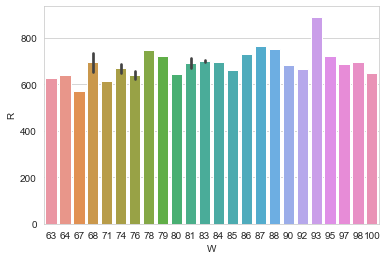

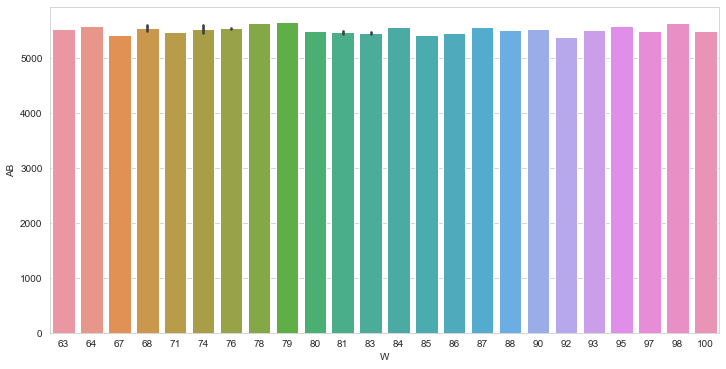

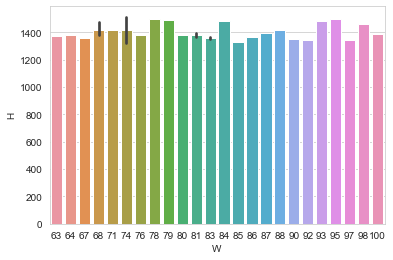

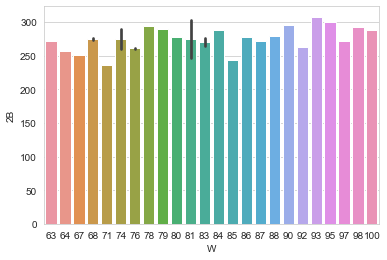

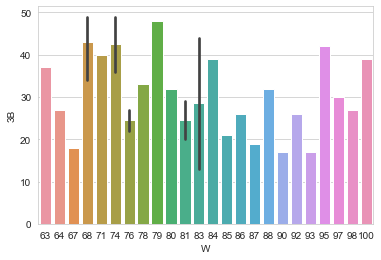

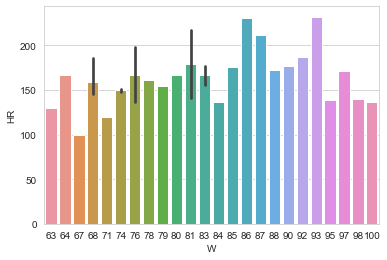

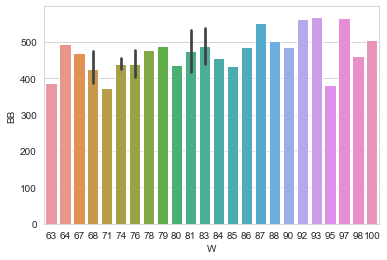

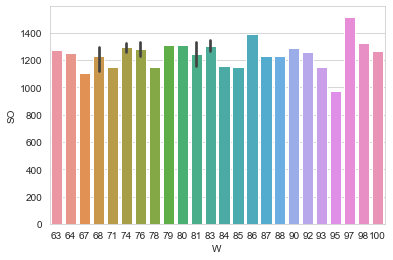

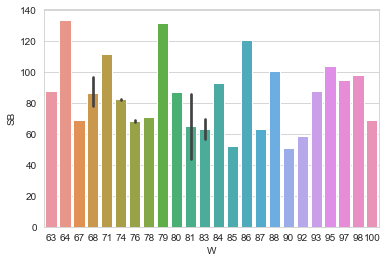

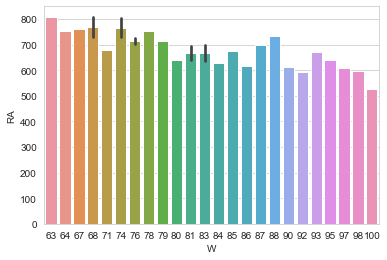

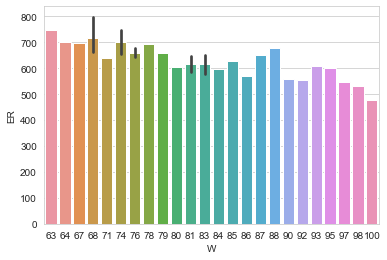

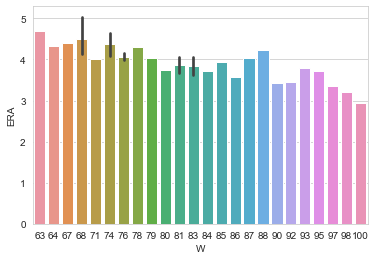

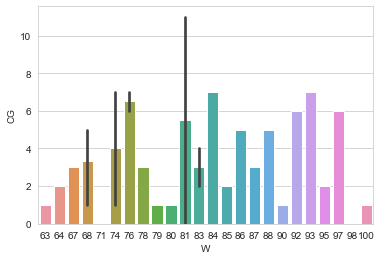

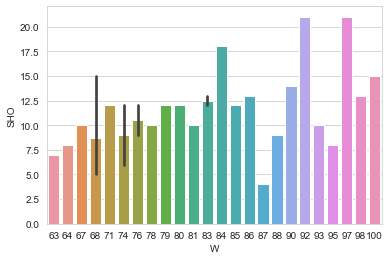

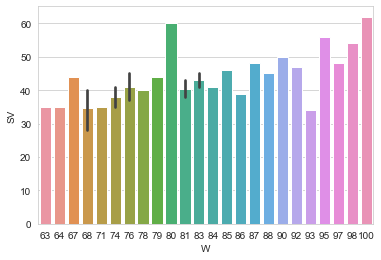

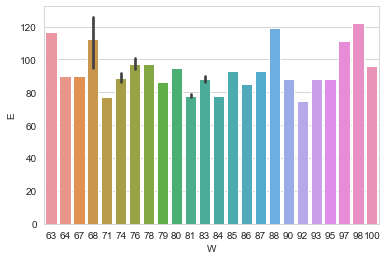

In [33]:
plt.figure(figsize=(12,6))
for i, cols in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.barplot(x='W',y=cols,data=df )

### Observations:
    1. Normal distribution is observed for AB,H vs W
    2. Abnormal distribution exist in R, 2B, 3B, HR, BB, SO, SB, CG, SHO, E, SV vs W
    3. Right handed tail graph is visible in RA vs W, ER vs W, ERA vs W

<ipython-input-49-2eb31a8f06fb>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 432x288 with 0 Axes>

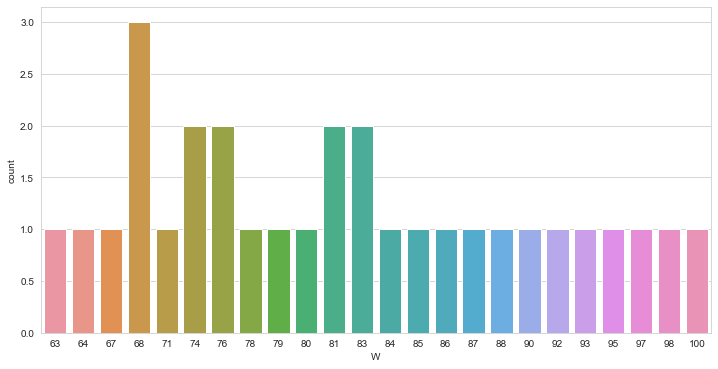

<Figure size 432x288 with 0 Axes>

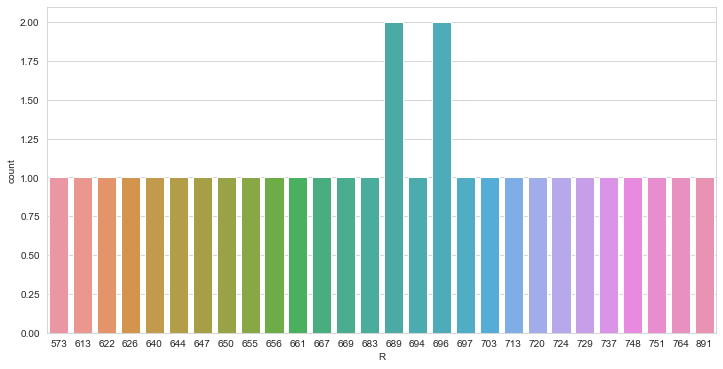

<Figure size 432x288 with 0 Axes>

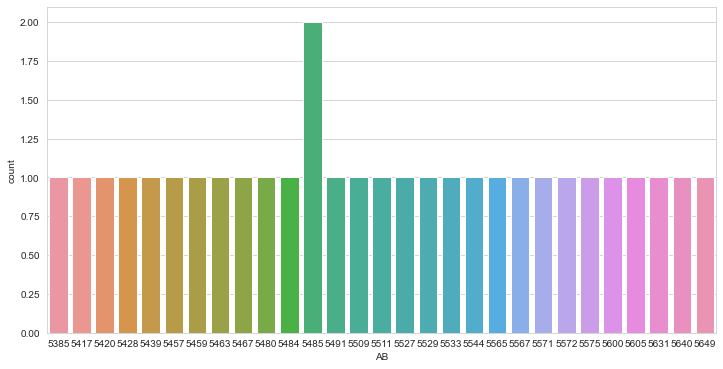

<Figure size 432x288 with 0 Axes>

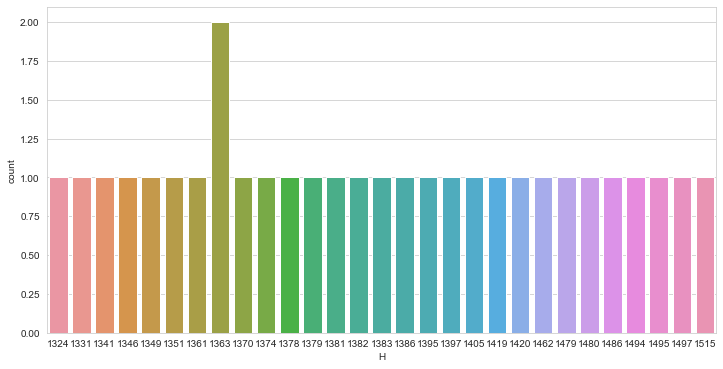

<Figure size 432x288 with 0 Axes>

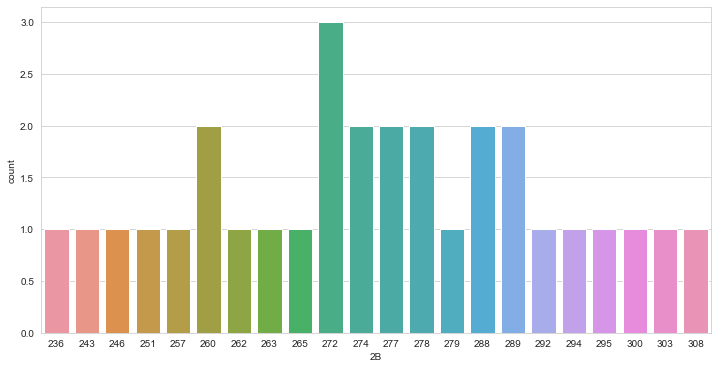

<Figure size 432x288 with 0 Axes>

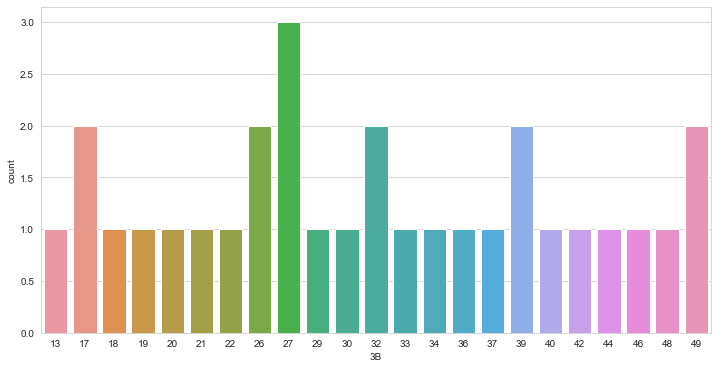

<Figure size 432x288 with 0 Axes>

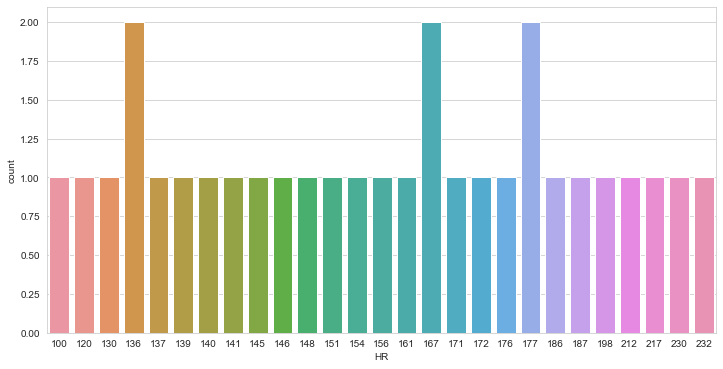

<Figure size 432x288 with 0 Axes>

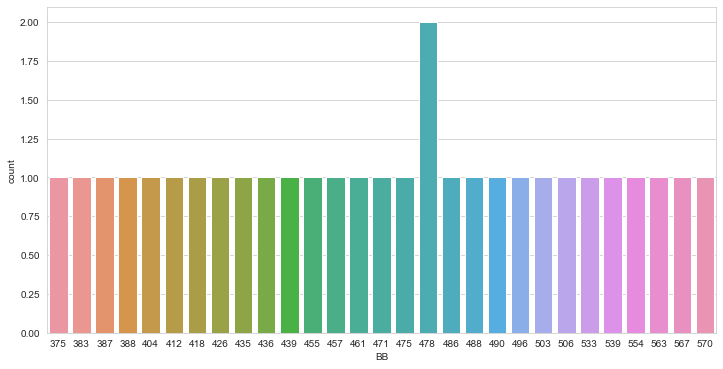

<Figure size 432x288 with 0 Axes>

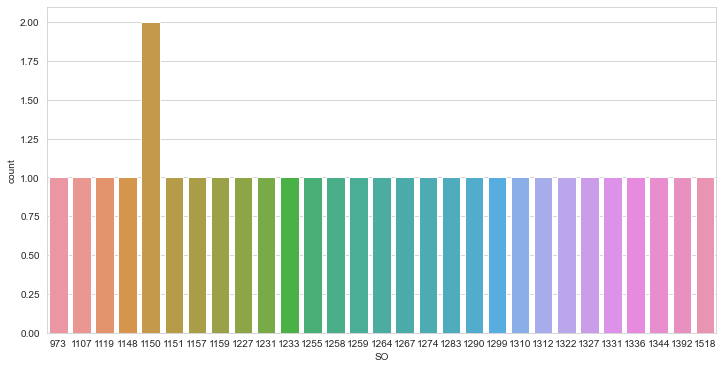

<Figure size 432x288 with 0 Axes>

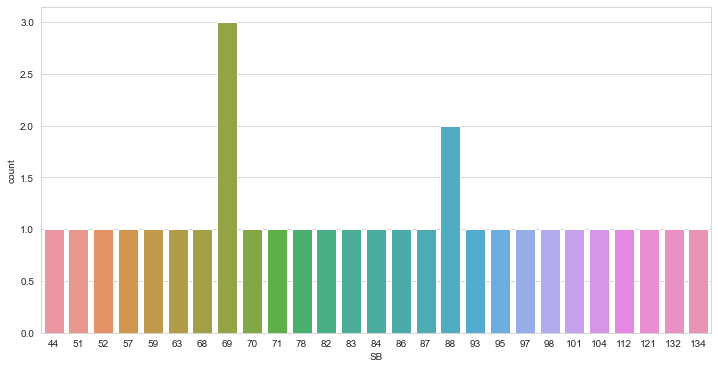

<Figure size 432x288 with 0 Axes>

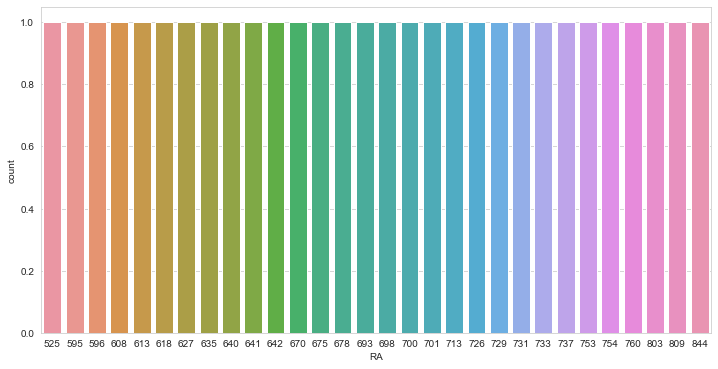

<Figure size 432x288 with 0 Axes>

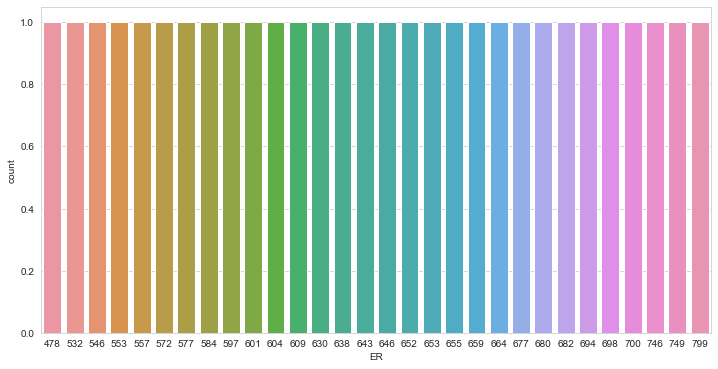

<Figure size 432x288 with 0 Axes>

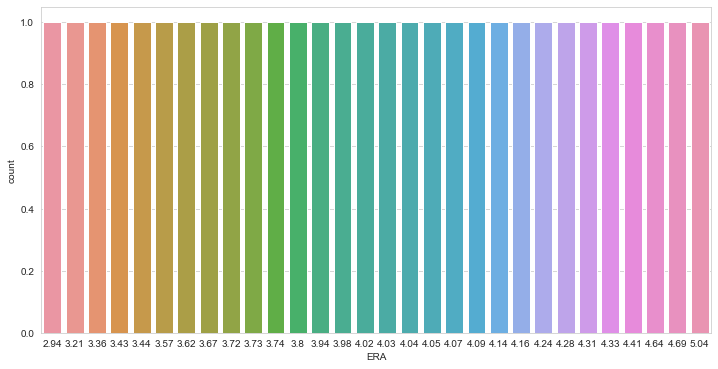

<Figure size 432x288 with 0 Axes>

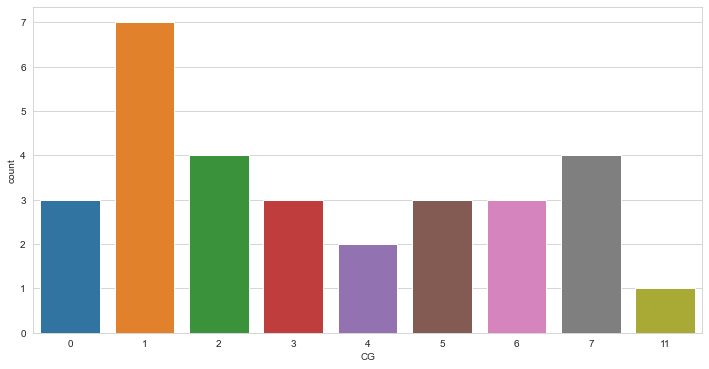

<Figure size 432x288 with 0 Axes>

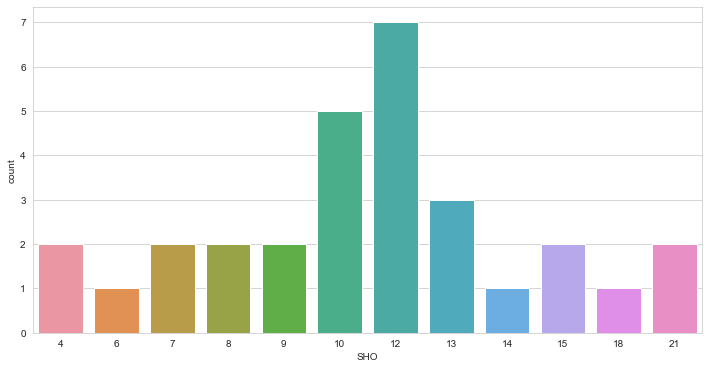

<Figure size 432x288 with 0 Axes>

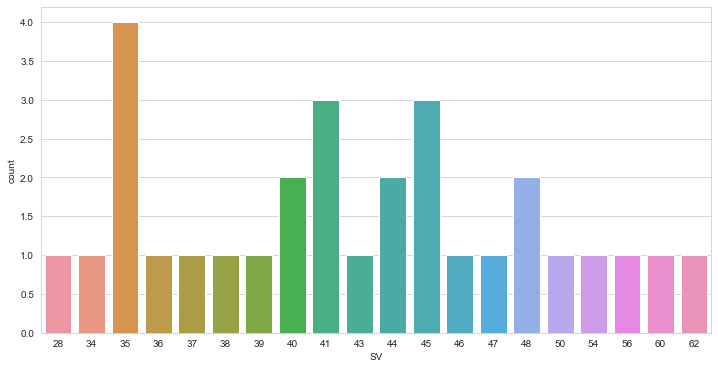

<Figure size 432x288 with 0 Axes>

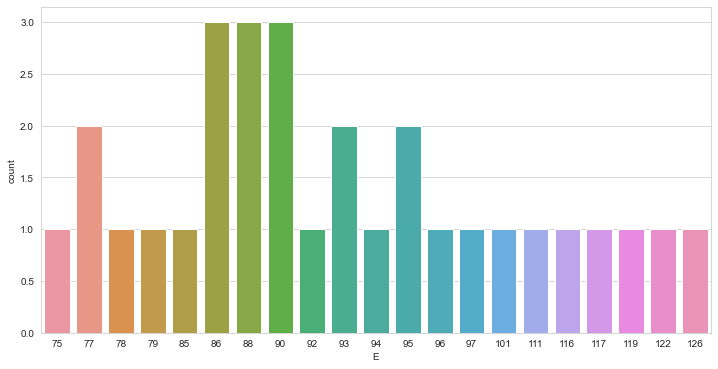

In [49]:
for i in df.columns:
    plt.figure(i)
    plt.figure(figsize=(12,6))
    sns.countplot(x=i,data=df )

Displaying countplot for every feature 

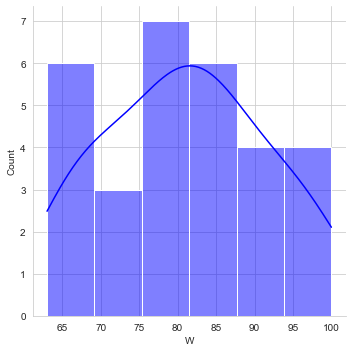

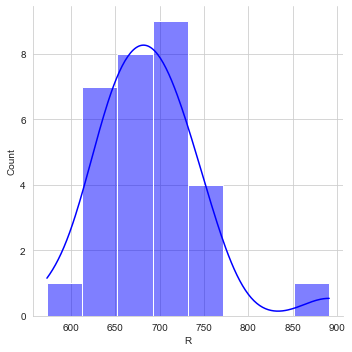

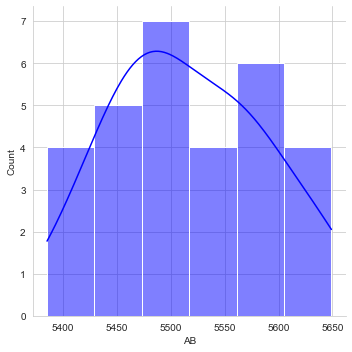

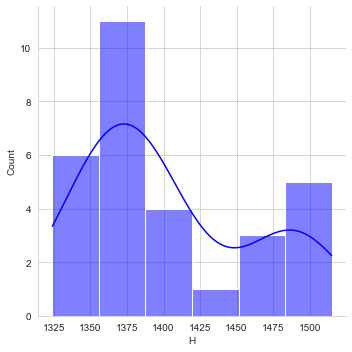

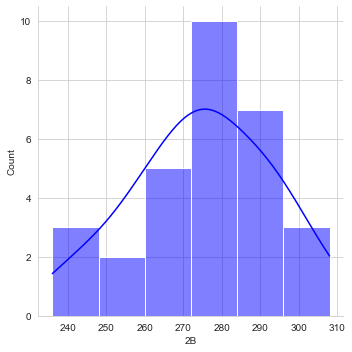

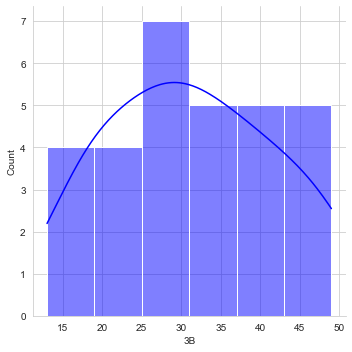

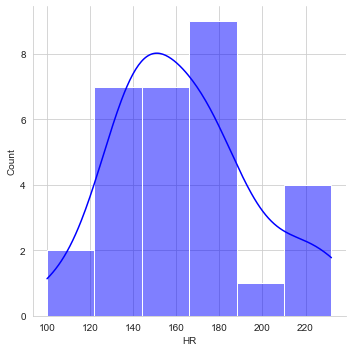

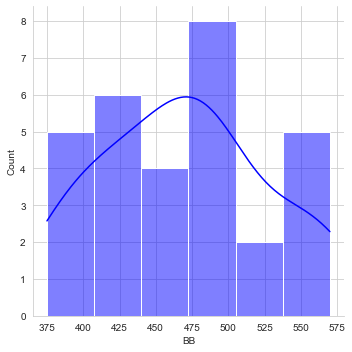

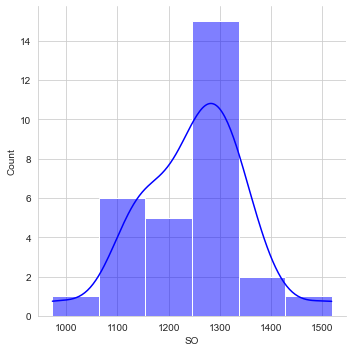

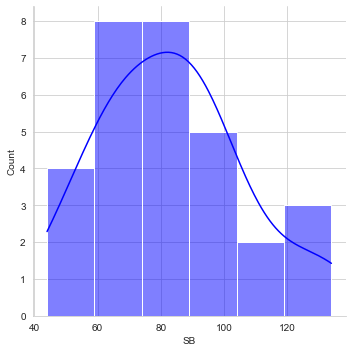

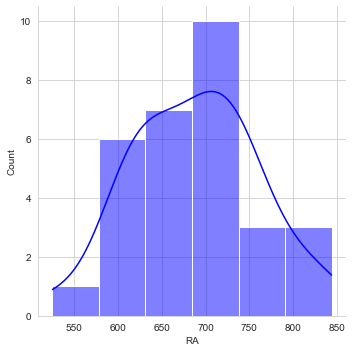

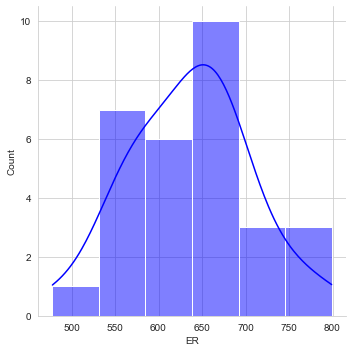

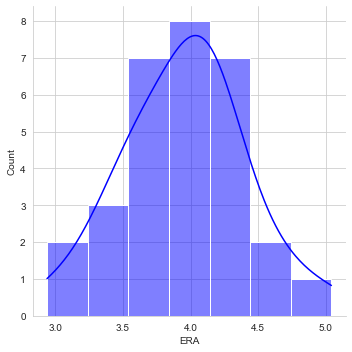

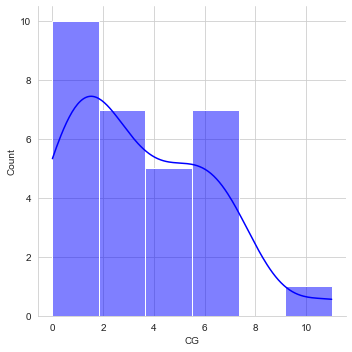

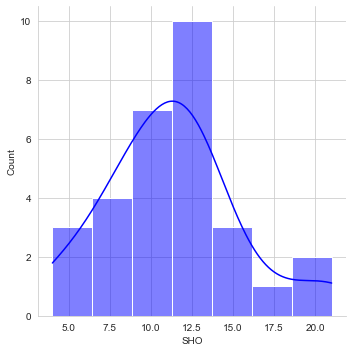

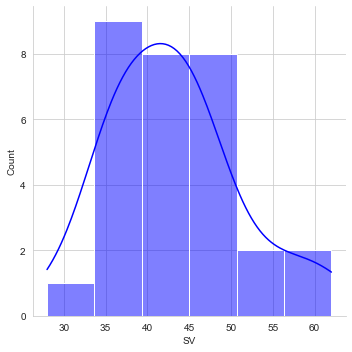

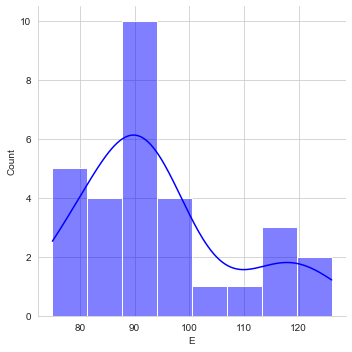

In [20]:
for i in df.columns:    
    sns.displot(x=i,color = 'blue', data = df, kde=True)

### Observations:
1. Normal distribution for W
2. Near gaussian distribution for R with extra modal peak between 850 & 900
3. For AB, kde seems to have near similar distribution
4. Bimodal distribution is visible for H
5. Left tail graph is present in 2B
6. Normal distribution for 3B
7. Right skewness can be prompted from the graph towards the end
8. Normal distribution for BB
9. Left skewness for SO
10. Right tail for SB
11. For RA, peak is between 700-750, geadually lowering on both side
12. Left skewness for ER
13. Gaussian like graph for ERA is present
14. Bimodal, right handed tail for CG
15. Imbalanced density for SHO
16. Bimodal,right skewed data for E

### Three plots for individual feature

In [52]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()


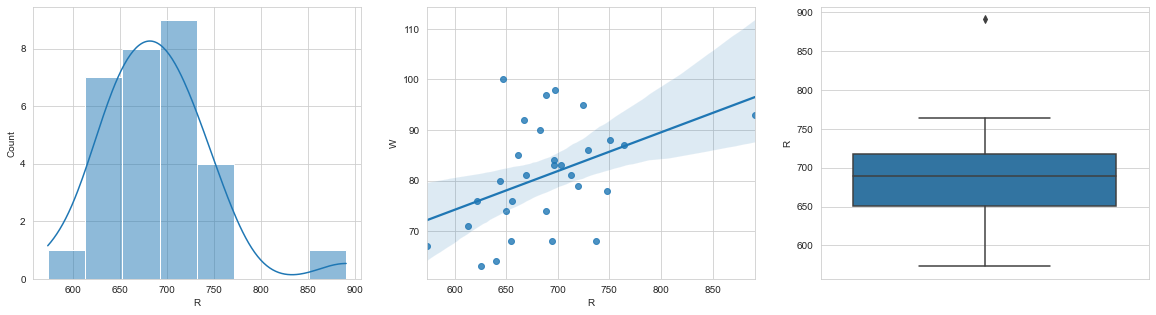

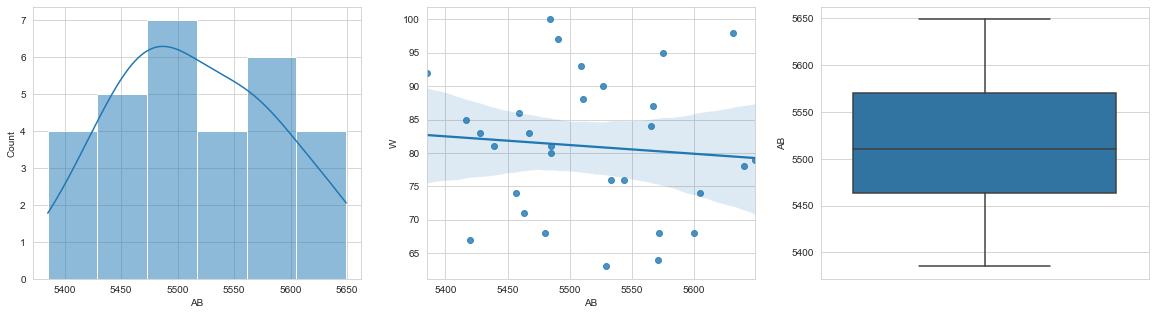

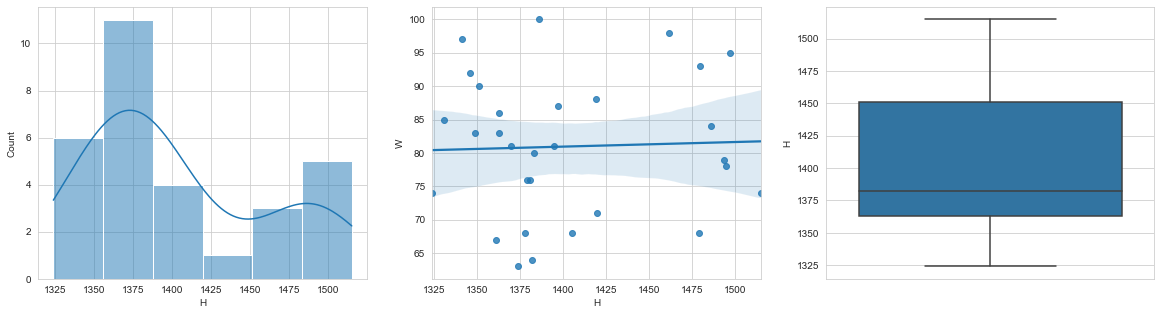

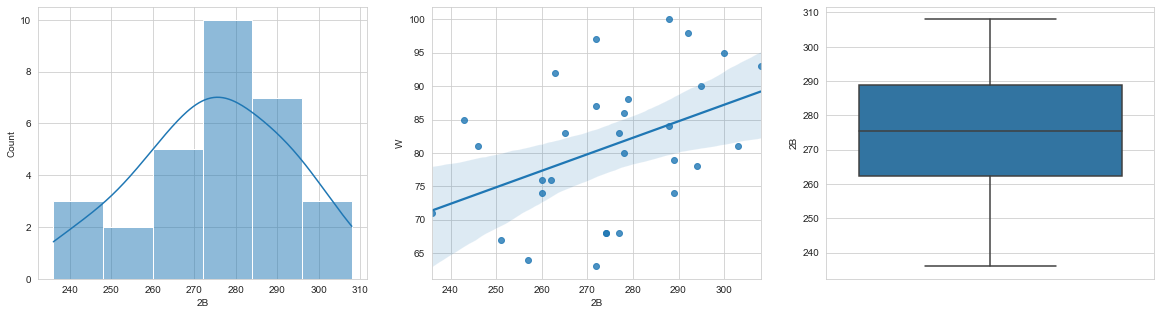

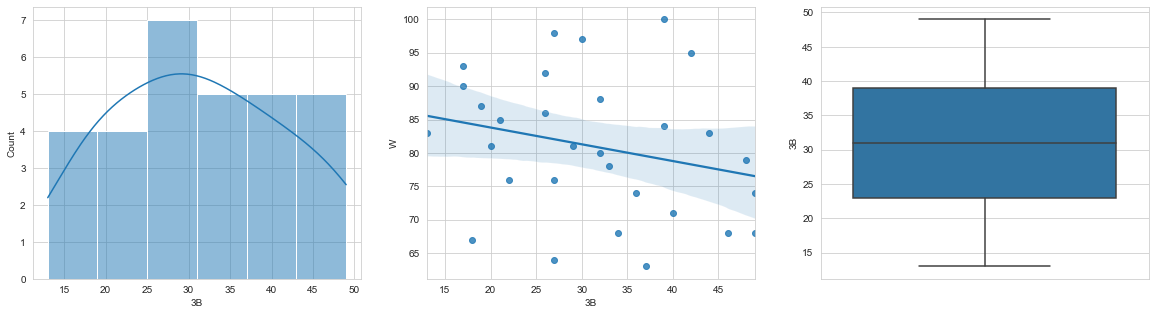

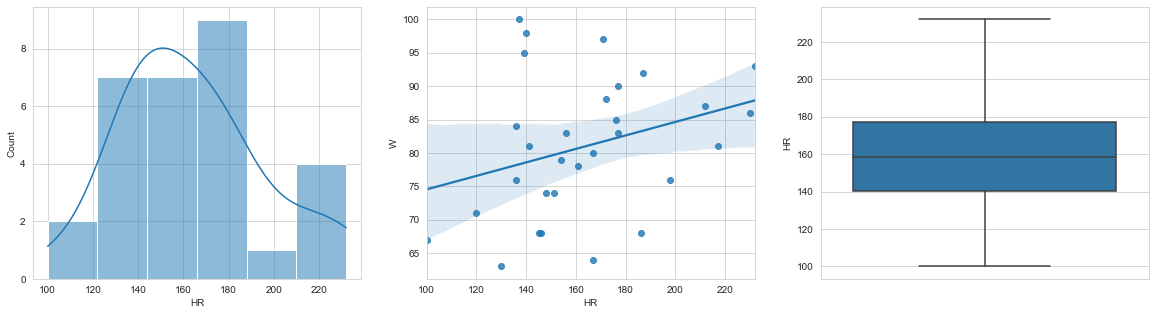

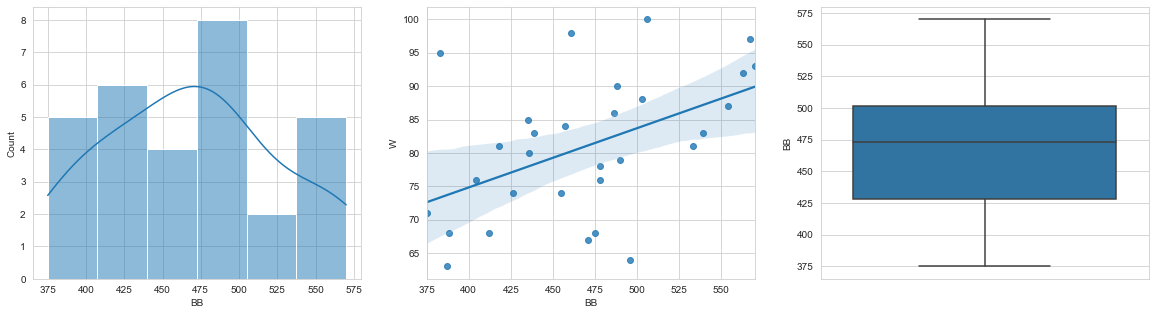

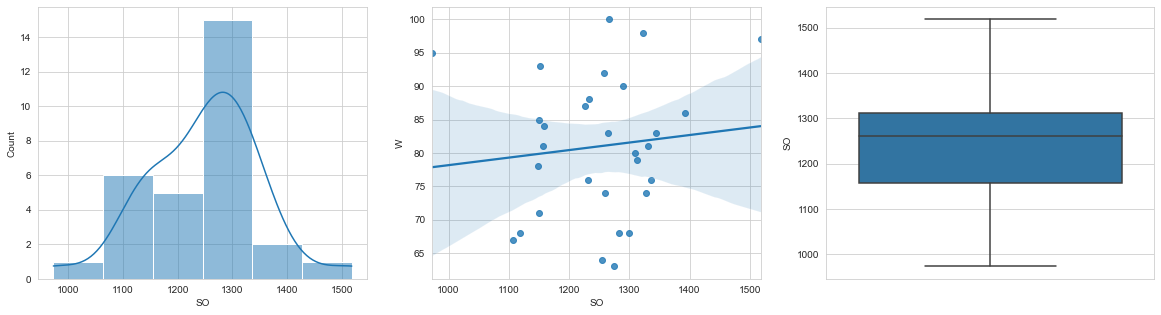

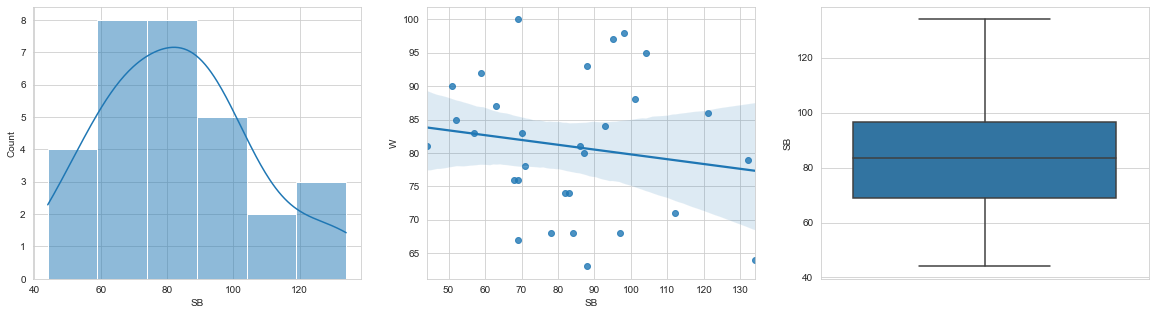

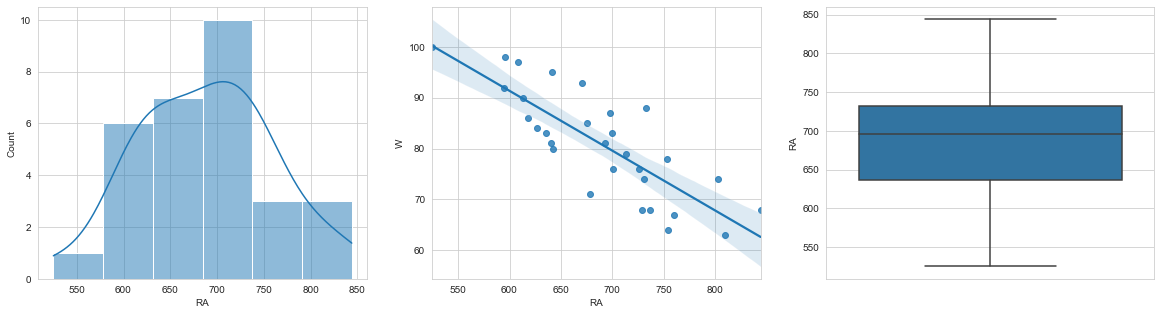

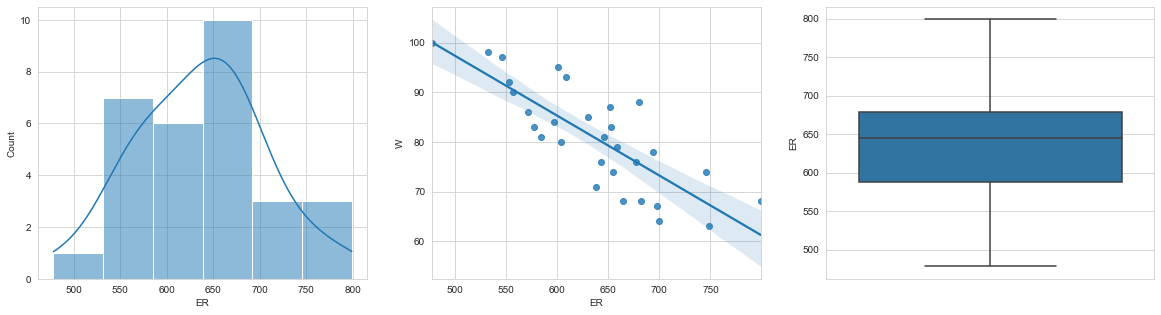

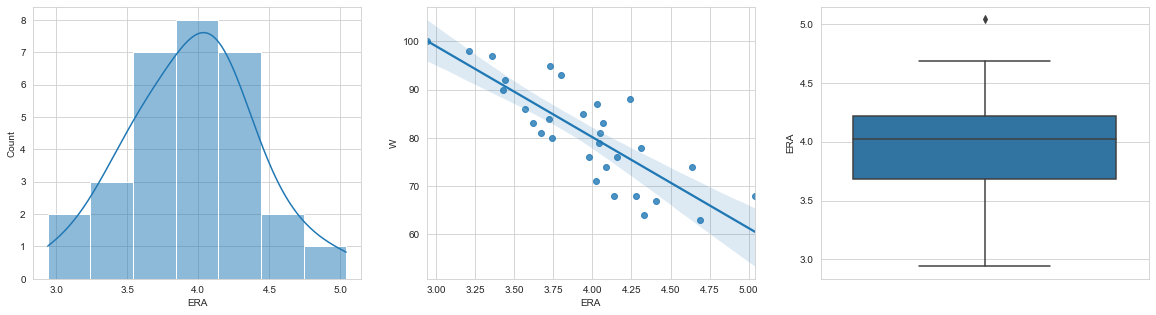

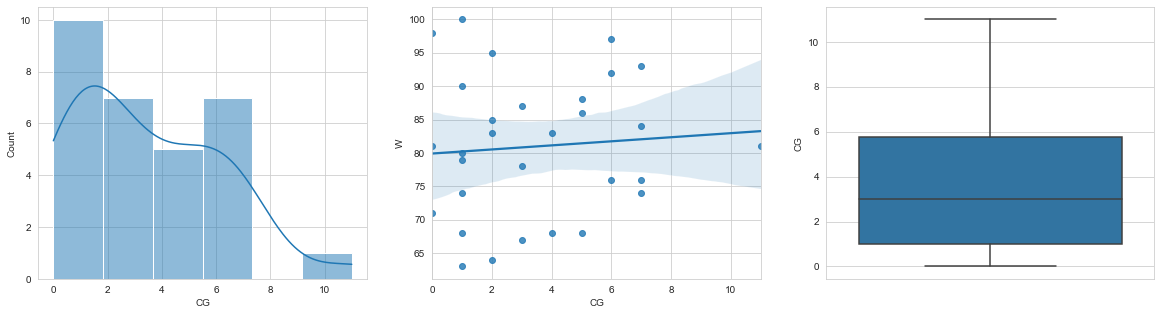

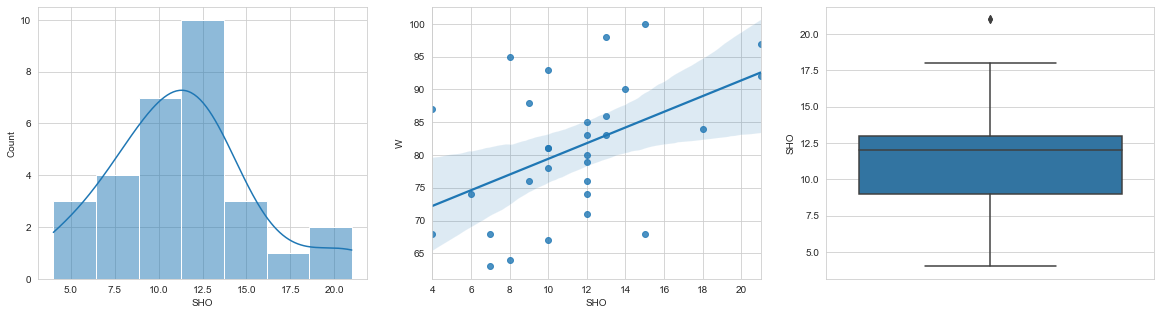

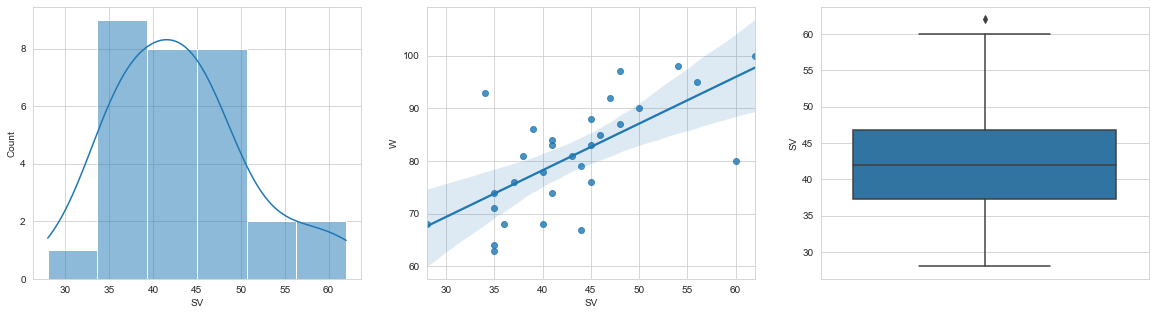

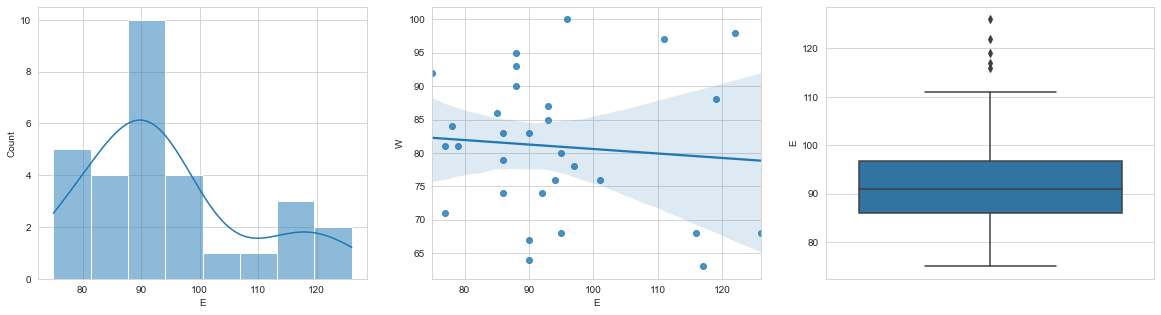

In [54]:
for i in df.columns[1:]:
    pplot(df,i)

Outliers Present in R, E. We'll not remove outliers since very few outliers are present and are not far away from IQR

# Data Preprocessing

In [56]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Looking at the values, since the scale of features are in different range, but for each feature the range is near, we can apply min-max scaling technique.

In [63]:
df['R'] = (df['R'] - df['R'].min())/(df['R'].max()-df['R'].min())
df['AB'] = (df['AB'] - df['AB'].min()) / (df['AB'].max()-df['AB'].min())
df['H'] = (df['H'] - df['H'].min()) / (df['H'].max()-df['H'].min())
df['2B'] = (df['2B'] - df['2B'].min())/(df['2B'].max()-df['2B'].min())
df['3B'] = (df['3B'] - df['3B'].min())/(df['3B'].max()-df['3B'].min())
df['HR'] = (df['HR'] - df['HR'].min())/(df['HR'].max()-df['HR'].min())
df['BB'] = (df['BB'] - df['BB'].min())/(df['BB'].max()-df['BB'].min())
df['SO'] = (df['SO'] - df['SO'].min())/(df['SO'].max()-df['SO'].min())
df['SB'] = (df['SB'] - df['SB'].min())/(df['SB'].max()-df['SB'].min())
df['RA'] = (df['RA'] - df['RA'].min())/(df['RA'].max()-df['RA'].min())
df['ER'] = (df['ER'] - df['ER'].min())/(df['ER'].max()-df['ER'].min())
df['ERA'] = (df['ERA'] - df['ERA'].min())/(df['ERA'].max()-df['ERA'].min())
df['CG'] = (df['CG'] - df['CG'].min())/(df['CG'].max()-df['CG'].min())
df['SHO'] = (df['SHO'] - df['SHO'].min())/(df['SHO'].max()-df['SHO'].min())
df['SV'] = (df['SV'] - df['SV'].min())/(df['SV'].max()-df['SV'].min())
df['E'] = (df['E'] - df['E'].min())/(df['E'].max()-df['E'].min())

In [100]:
df['W'] = (df['W'] - df['W'].min()) / (df['W'].max() - df['W'].min())

In [66]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,83,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,81,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,76,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,74,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686


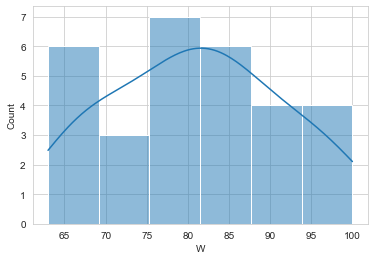

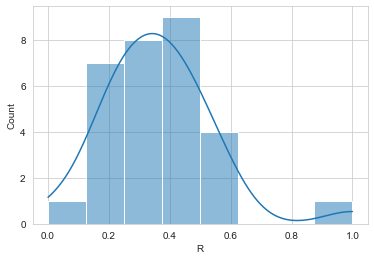

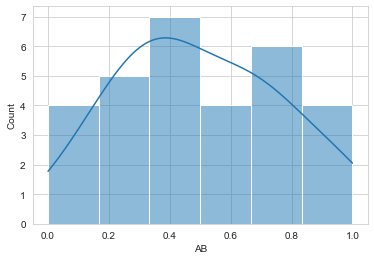

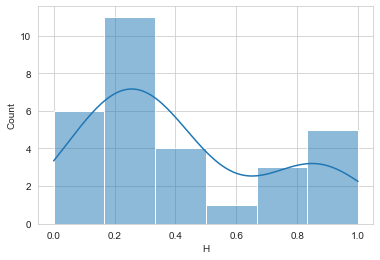

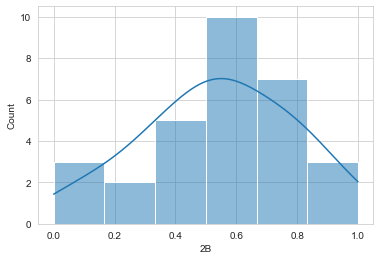

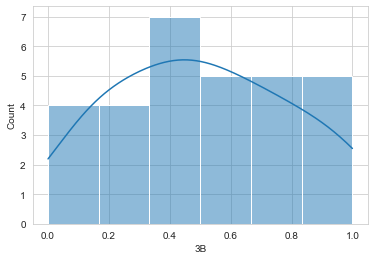

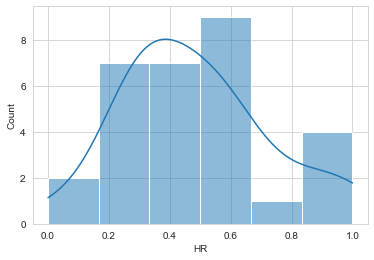

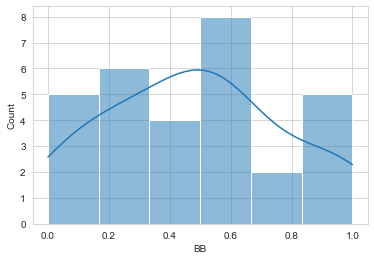

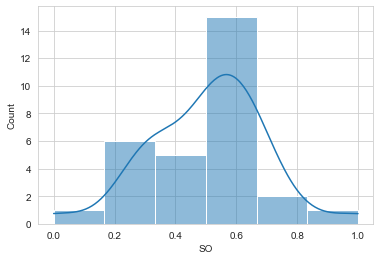

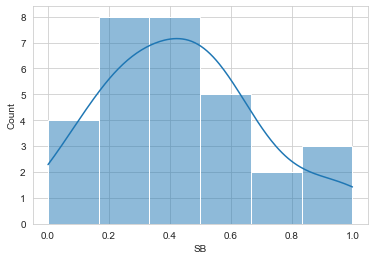

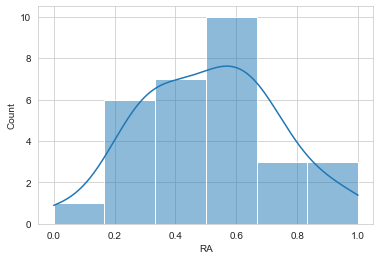

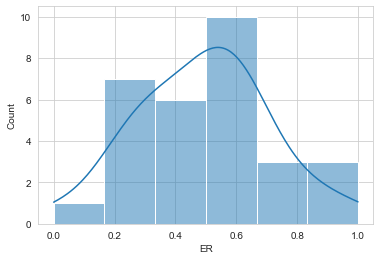

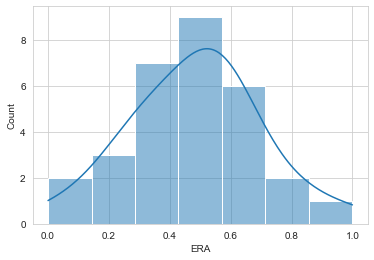

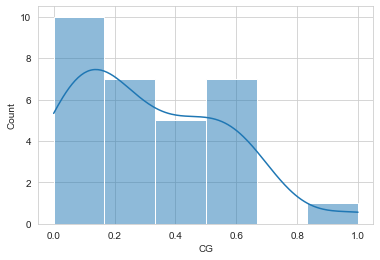

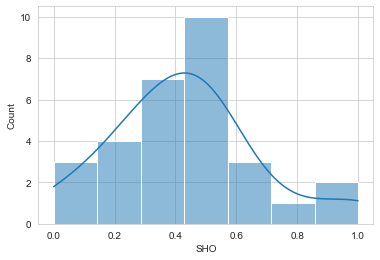

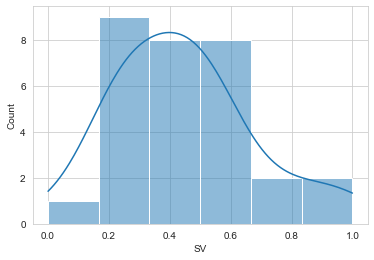

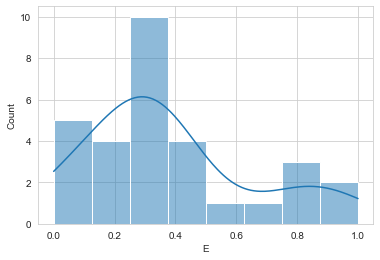

In [76]:
for i in df.columns:
    plt.figure(i)
    sns.histplot(x=i, data = df, kde=True)

Skewness is still present

In [67]:
#checking the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Skewness is visible in 'R', 'H', 'CG', 'SV', 'E'

### Splitting Dataset

In [77]:
X = df.drop('W',axis=1)
y = df['W']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 16), (8, 16), (22,), (8,))

In [81]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686
5,1.000000,0.469697,0.816754,1.000000,0.111111,1.000000,1.000000,0.326606,0.488889,0.454545,0.408100,0.409524,0.636364,0.352941,0.176471,0.254902
6,0.600629,0.689394,0.382199,0.500000,0.166667,0.848485,0.917949,0.466055,0.211111,0.542320,0.542056,0.519048,0.272727,0.000000,0.588235,0.352941
7,0.440252,0.378788,0.240838,0.138889,0.194444,0.886364,0.220513,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.352941,0.441176,0.039216
8,0.223270,0.378788,0.308901,0.583333,0.527778,0.507576,0.312821,0.618349,0.477778,0.366771,0.392523,0.380952,0.090909,0.470588,0.941176,0.392157
9,0.550314,0.965909,0.895288,0.805556,0.555556,0.462121,0.528205,0.321101,0.300000,0.714734,0.672897,0.652381,0.272727,0.352941,0.352941,0.431373


In [84]:
df['R'] = np.log1p(df['R'])

df['H'] = np.log1p(df['R'])
df['CG'] = np.log1p(df['CG'])
df['SV'] = np.log1p(df['SV'])
df['E'] = np.log1p(df['E'])

In [101]:
df.skew()

W      0.047089
R      0.499869
AB     0.183437
H      0.008513
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.403839
SHO    0.565790
SV     0.216842
E      0.535897
dtype: float64

# Model Training

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [95]:
def CV_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cv_score = cross_val_score(model, X, y, cv=5, scoring = 'r2' )
    cv_score = np.mean(cv_score)
    
    print('Mean absolute error:', MAE(y_test,y_pred))
    print('Root mean squared error:', np.sqrt(MSE(y_test,y_pred)))
    print('R2 Score:', r2_score(y_test,y_pred))
    print('CV Score:', cv_score)

## GridSearch & Parameter Tuning

### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
CV_score(lr)

Mean absolute error: 4.419246025371734
Root mean squared error: 5.40358249980711
R2 Score: 0.8032929426039804
CV Score: 0.04075540667456379


### Support Vector Regressor

In [103]:
from sklearn.svm import SVR
svr = SVR()
svr_para = {'C': [0.6,0.7,0.8,0.9,1,1.2,1.3,1.4,1.5],
            'kernel': ['rbf','poly','linear'],
            }
svr_tuning = GridSearchCV(estimator = svr, param_grid = svr_para, cv=5, scoring = 'r2')
svr_tuning.fit(X,y)
print(svr_tuning.best_params_)
print(svr_tuning.best_score_)

{'C': 1.5, 'kernel': 'linear'}
0.007846097508533245


In [104]:
svr = SVR(C=1.5, kernel = 'rbf')
CV_score(svr)

Mean absolute error: 10.034486186238652
Root mean squared error: 11.401679937179898
R2 Score: 0.12422194263652642
CV Score: -0.383167621786282


### Decision Tree Regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_para = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter' : ['best','random'],
            'max_features': ['auto','sqrt','log2']}
dtr_tuning = GridSearchCV(dtr, dtr_para, cv=5, scoring = 'r2')
dtr_tuning.fit(X,y)
print(dtr_tuning.best_params_)
print(dtr_tuning.best_score_)

{'criterion': 'squared_error', 'max_features': 'log2', 'splitter': 'best'}
-0.5702230719161244


In [106]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_features = 'log2', splitter = 'best')
CV_score(dtr)

Mean absolute error: 5.5
Root mean squared error: 6.48074069840786
R2 Score: 0.7170526315789474
CV Score: -1.6875576740015052


### Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_para = {'criterion': ['squared_error','poisson','absolute_error'],
            'n_estimators' : [100,125,150,175,200], 
            'max_features' : ['auto','sqrt','log2'] }
rfr_tuning = GridSearchCV( rfr, rfr_para, cv = 5, scoring = 'r2')
rfr_tuning.fit(X,y)
print(rfr_tuning.best_params_)
print(rfr_tuning.best_score_)

{'criterion': 'poisson', 'max_features': 'auto', 'n_estimators': 100}
-0.05990244245451424


In [108]:
rfr = RandomForestRegressor(n_estimators = 100, criterion = 'poisson', max_features = 'auto')
CV_score(rfr)

Mean absolute error: 6.86375
Root mean squared error: 7.754817051355886
R2 Score: 0.5948652631578948
CV Score: -0.16085879999209132


### Extra Tree Regressor

In [109]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr_para = {'criterion': ['squared_error','absolute_error'],
            'max_features': ['auto','sqrt','log2'],
            'n_estimators': [100,125,150,175,200]
           }
etr_tuning = GridSearchCV(etr, etr_para, cv=5, scoring ='r2')
etr_tuning.fit(X,y)
print(etr_tuning.best_params_)
print(etr_tuning.best_score_)

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 100}
-0.12962127552215671


In [111]:
etr = ExtraTreesRegressor(n_estimators = 100, criterion = 'squared_error', max_features = 'log2')
CV_score(etr)

Mean absolute error: 4.6537500000000005
Root mean squared error: 5.663189251649638
R2 Score: 0.7839379368421053
CV Score: -0.27761469906522


### KNeighbors Regressor

In [112]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : [5,10,15,20],
              'weights': ['uniform','distance'], 
              'algorithm' : ['auto','ball_tree','kd_tree','brute'], 
              'metric' : ['euclidean','minkowski']}
knr_tuning = GridSearchCV(knr, knr_params, cv =5, scoring = 'r2')
knr_tuning.fit(X,y)
print(knr_tuning.best_params_)
print(knr_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
-0.2594848817042779


In [113]:
knr = KNeighborsRegressor(n_neighbors = 10, algorithm = 'auto', metric = 'euclidean', weights = 'distance')
CV_score(knr)

Mean absolute error: 6.2950277718954
Root mean squared error: 7.856360732303244
R2 Score: 0.5841859101906435
CV Score: -0.2594848817042779
